In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 4

## LeapFrog Matricial y no matricial


$t \in (0,10) $ 

Matriz simpléctica 

$J = \begin{pmatrix}
0 & 1 \\
-1 & 0 
\end{pmatrix}$

Condiciones iniciales

$U^{0} = \begin{pmatrix}
1  \\
0  
\end{pmatrix}$

In [2]:
#Discretización temporal
N= 1001
t = np.linspace(0,10,N)
gl = 2 #Grados de libertad

#Parámetros
m,k = 1,1

In [3]:
def GetLeapFrog(r0, t):
    J = np.array([[0,1], [-1,0]]) #Matriz simpléctica
    def F(U):
        F = np.dot(J, U)
        return F
    h = (t[-1] - t[0])/(N-1)
    U = np.zeros((len(t), gl ))
    U[0] = r0
    
    for i in range(1,len(t)):
        if i == 1:
            U[i] = U[i-1] + h*F(U[i-1])
        else:
            U[i] = U[i-2] + 2*h*F(U[i-1])
    E = np.zeros((len(t), gl))
    x = U[:,0]
    v = U[:,1]

    return x, v

In [4]:
def GetA(x):
    return -x
def GetLeapFrog1(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    
    x = np.zeros(N)
    v = np.zeros(N) 
    
    # El inicializador
    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    return X,V

# Yoshida

In [7]:
parameter = np.cbrt(2)
w0 = -(parameter)/(2-parameter)
w1 = 1/(2-parameter)
c1,c4 = w1/2, w1/2
c2, c3 = (w0+w1)/2, (w0+w1)/2
d1, d3 = w1,w1
d2 = w0

In [8]:
def a(x):
    return -x

In [10]:
def Yoshida(r0, t):
    N = len(t)
    h = t[1] - t[0]
    
    X = np.zeros(N)
    V = np.zeros(N)
    
    X[0]=r0[0]
    V[0]=r0[1]
    
    for i in range(1, N):
        x_1 = X[i-1] +c1*V[i-1]*h
        v_1 = V[i-1] +d1*a(x_1)*h
        
        x_2 = x_1 + c2*v_1*h
        v_2 = v_1 + d2*a(x_2)*h
        
        x_3 = x_2 + c3*v_2*h
        v_3 = v_2 + d3*a(x_3)*h
        
        x_4 = x_3 + c4*v_3*h
        
        X[i] = x_4
        V[i] = v_3
        
    return X, V

In [11]:
r0 = np.array([1,0])
x, v = GetLeapFrog(r0, t)
x1, v1 = GetLeapFrog1(r0, t)
x2, v2 = Yoshida(r0, t)

In [12]:
#Energías
"Leapfrog"
Ke1 = 0.5*v1**2
Ep1 = 0.5*x1**2
"Leapfrog Matricial"
Ke2 = 0.5*v**2
Ep2 = 0.5*x**2
"Yoshida"
Ke3 = 0.5*v2**2
Ep3 = 0.5*x2**2

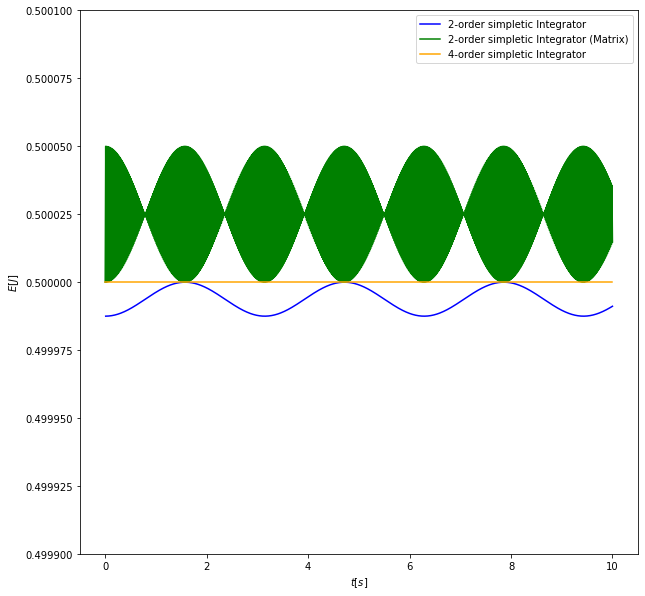

In [16]:
fig = plt.figure(figsize=(10,10))
meanE = np.average(Ke+U)
plt.plot(t[1:], Ke1 + Ep1 , c = 'b', label = "2-order simpletic Integrator")
plt.plot(t, Ke2+Ep2 , c = 'g', label = "2-order simpletic Integrator (Matrix)")
plt.plot(t, Ke3+Ep3 , c = 'orange', label = "4-order simpletic Integrator")
plt.xlabel("$t[s]$")
plt.ylabel("$E[J]$")
plt.ylim(0.4999,0.5001)
plt.legend(loc=0)